In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ds = xr.open_dataset(r"C:\Users\TyHow\Downloads\NetCDF_2025-04-17T16_55_48.122071_6c1d5cd4-6e68-4c32-bdc2-2803428e4765.nc")

In [5]:
print(ds)

<xarray.Dataset> Size: 266kB
Dimensions:                                              (x: 115, y: 115)
Coordinates:
    band                                                 int64 8B ...
  * x                                                    (x) float64 920B 42....
  * y                                                    (y) float64 920B 19....
Data variables:
    spatial_ref                                          int64 8B ...
    COG_kriging_Ag_ppm_516e7f33d07c41f7b69efe1d89375d0b  (y, x) float32 53kB ...
    Aeromagnetic Survey RTP ANSIG Jabal Al Hasir         (y, x) float64 106kB ...
    Aeromagnetic Survey RTP Jabal Al Hasir               (y, x) float64 106kB ...
Attributes:
    crs:      EPSG:4326


In [14]:
for var in ds.data_vars:
    data = ds[var].values
    print(f"--- {var} ---")
    print(f"  Shape: {data.shape}")
    print(f"  Min: {np.nanmin(data)}")
    print(f"  Max: {np.nanmax(data)}")
    print(f"  Mean: {np.nanmean(data)}")
    print(f"  Std Dev: {np.nanstd(data)}")
    print(f"  NaNs: {np.isnan(data).sum()}")

--- spatial_ref ---
  Shape: ()
  Min: 0
  Max: 0
  Mean: 0.0
  Std Dev: 0.0
  NaNs: 0
--- COG_kriging_Ag_ppm_516e7f33d07c41f7b69efe1d89375d0b ---
  Shape: (115, 115)
  Min: 0.01902475394308567
  Max: 0.04336769878864288
  Mean: 0.027229122817516327
  Std Dev: 0.004947826731950045
  NaNs: 3462
--- Aeromagnetic Survey RTP ANSIG Jabal Al Hasir ---
  Shape: (115, 115)
  Min: 0.0006900000153109431
  Max: 1.3566099405288696
  Mean: 0.09775668171477851
  Std Dev: 0.10892107849441028
  NaNs: 3289
--- Aeromagnetic Survey RTP Jabal Al Hasir ---
  Shape: (115, 115)
  Min: -327.9100036621094
  Max: 709.77001953125
  Mean: 12.861682098858562
  Std Dev: 94.16816263021681
  NaNs: 3291


In [17]:
def plot_layer(ds, layer_name, cmap="Greys"):
    if layer_name not in ds.data_vars:
        raise ValueError(f"Layer '{layer_name}' not found in dataset.")

    data = ds[layer_name]

    plt.figure(figsize=(8, 6))
    im = plt.pcolormesh(ds["x"], ds["y"], data, cmap=cmap, shading="auto")
    plt.colorbar(im, label=layer_name)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Layer: {layer_name}")
    plt.show()

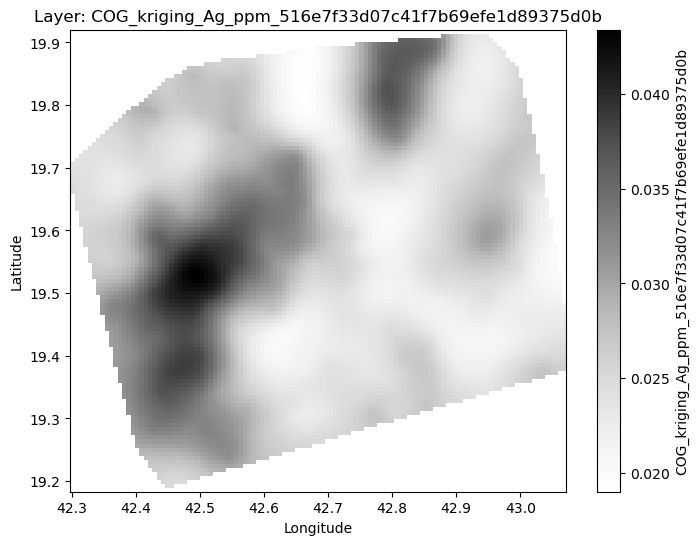

In [18]:
plot_layer(ds, "COG_kriging_Ag_ppm_516e7f33d07c41f7b69efe1d89375d0b")